In [1]:
import pandas as pd
import os
import numpy as np

C:\ProgramData\Anaconda3\envs\gpu2\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\envs\gpu2\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\envs\gpu2\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:

data = pd.read_csv("orderdata.csv",index_col='time',delimiter=',',parse_dates=True)
#If count is zero then data count is actaully 1
data['Count']= data['Count'].replace(0,1)

In [6]:
data.head()

,Unnamed: 0,Id,Count
time,,,
2021-01-16 05:00:00,3221,374,2
2021-01-16 05:00:00,3222,374,1
2021-01-16 05:00:00,3223,374,1
2021-01-16 05:00:00,3224,374,1
2021-01-16 05:00:00,3225,374,1


In [7]:
data.drop(columns=['Unnamed: 0'],inplace=True, axis=1)

In [8]:
data.head()

,Id,Count
time,,
2021-01-16 05:00:00,374,2
2021-01-16 05:00:00,374,1
2021-01-16 05:00:00,374,1
2021-01-16 05:00:00,374,1
2021-01-16 05:00:00,374,1


In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import HTML
### Testing For Stationarity


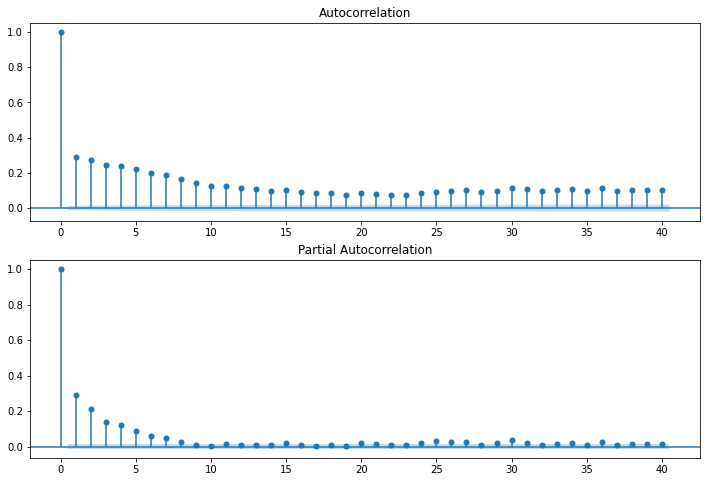

In [14]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Count'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Count'].iloc[13:],lags=40,ax=ax2)

In [15]:
#It seems there is no relation but let's fill the gaps with zero
data1 = data.groupby(['Id']).resample('H')['Count'].sum()
data2 = pd.DataFrame(data1)
data2.reset_index(inplace=True)

In [19]:
print(data.shape, data2.shape)

(24021, 2) (7377, 3)


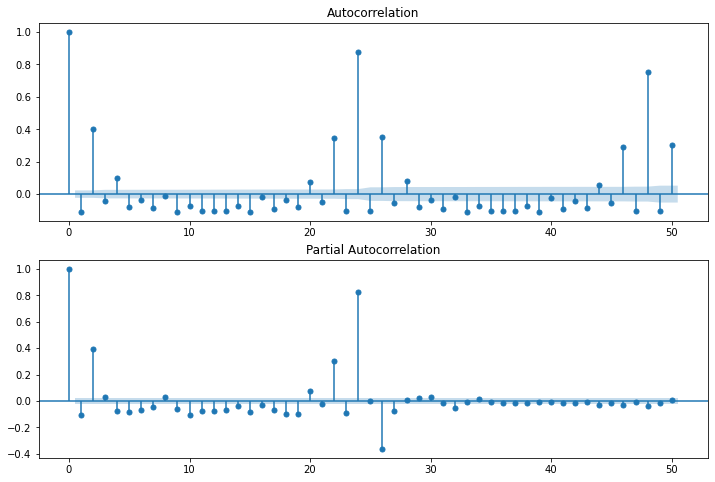

In [20]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data2['Count'].iloc[13:],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data2['Count'].iloc[13:],lags=50,ax=ax2)

In [21]:
# Here we see data data is hight ralted to same ours to its previous days

In [23]:
from pandas.plotting import autocorrelation_plot

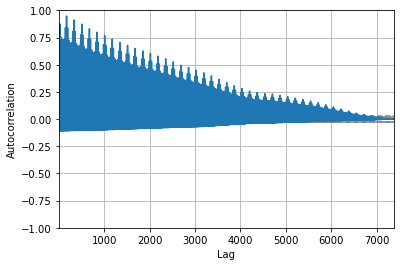

In [25]:
autocorrelation_plot(data2['Count'])
plt.show()